In [1]:
import pandas as pd
import numpy as np

try:
    datos = pd.read_excel('homicidios.xlsx')
    print('Archivo cargado')

    print(datos.dtypes)
except:
    print('No se encontró el archivo')


Archivo cargado
ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                                int64
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object


**Outliers**

In [2]:
victimas = datos.groupby('N_VICTIMAS').size()

out_vict = datos['N_VICTIMAS'].mean()+(3*datos['N_VICTIMAS'].std())
vic_mean = datos['N_VICTIMAS'].mean()
print("NUMERO DE VÍCTIMAS")
print(f'\nPromedio: {vic_mean:.2f}')
print(f"Número de Víctima mayor a ={out_vict:.2f} son Outliers")
print(f"Accidentes con más de una victima: \t{datos['N_VICTIMAS'][datos['N_VICTIMAS']>1].count()}")
print(f"Accidentes totales: \t\t\t{datos['N_VICTIMAS'].count()}")

NUMERO DE VÍCTIMAS

Promedio: 1.03
Número de Víctima mayor a =1.57 son Outliers
Accidentes con más de una victima: 	20
Accidentes totales: 			696


Esto sugiere que en la mayoria de los eventos solo muere una persona
Mayor a ese número es Outliers

In [3]:
AAAA = datos.groupby('AAAA').size()
print("AÑOS")
print('\nmedia: ',AAAA.mean())
print(f'desvio: {AAAA.std():.2f}')
print(f'limite inferior: {AAAA.mean()-(3*AAAA.std()):.2f}; valor mínimo{AAAA.min():.2f}')
print(f'limite superior: {AAAA.mean()+(3*AAAA.std()):.2f}; valor Máximo{AAAA.max():.2f}')

AÑOS

media:  116.0
desvio: 27.25
limite inferior: 34.26; valor mínimo78.00
limite superior: 197.74; valor Máximo144.00


Como el mínimo es mayor al limite inferior

y el máximo es menor al limite superior

se puede decir que:

No se observan Outliers

In [4]:
MM = datos.groupby('MM').size().sort_index(ascending= True)
print("MESES")
print('\nmedia: ',MM.mean())
print(f'desvio: {MM.std():.2f}')
print(f'limite inferior: {MM.mean()-(3*MM.std()):.2f}; valor mínimo{MM.min():.2f}')
print(f'limite superior: {MM.mean()+(3*MM.std()):.2f}; valor Máximo{MM.max():.2f}')

MESES

media:  58.0
desvio: 8.97
limite inferior: 31.08; valor mínimo47.00
limite superior: 84.92; valor Máximo78.00


Como los valores se encuetnran dentro de los limites de Outliers,

No se encuentran Outliers

In [5]:
DD = datos.groupby('DD').size().sort_values(ascending= False)
print("DIAS")
print('\nmedia: ',DD.mean())
print(f'desvio: {DD.std():.2f}')
print(f'limite inferior: {DD.mean()-(3*DD.std()):.2f}; valor mínimo{DD.min():.2f}')
print(f'limite superior: {DD.mean()+(3*DD.std()):.2f}; valor Máximo{DD.max():.2f}')

DIAS

media:  22.451612903225808
desvio: 4.31
limite inferior: 9.52; valor mínimo13.00
limite superior: 35.39; valor Máximo31.00


Como los valores se encuetnran dentro de los limites de Outliers,

No se encuentran Outliers

***Veamos si los días tienen un Outliers durante la semana***

In [6]:
import datetime
def obtener_dia_semana(fila):
    fecha = datetime.datetime(fila['AAAA'], fila['MM'], fila['DD'])
    return fecha.strftime('%A')

datos['dia_semana'] = datos.apply(obtener_dia_semana, axis=1)
dias = datos['dia_semana'].value_counts()
dd_sem = datos['dia_semana'].value_counts()
print('DÍAS DE LA SEMANA')
print(f'\nPromedio: {dd_sem.mean():.2f}\nDesvio: {dd_sem.std():.2f}\nLimite superiór: {dd_sem.mean()+3*dd_sem.std():.2f}\nLimite inferior: {dd_sem.mean()-3*dd_sem.std():.2f}')


DÍAS DE LA SEMANA

Promedio: 99.43
Desvio: 3.82
Limite superiór: 110.90
Limite inferior: 87.96


**Tampoco aquí hay Outliers aquí**

In [7]:
#Exportamos los dias de la semana para power BI |
dias_semanas = datos[['ID','dia_semana']]
dias_semanas.to_excel('DiasSemana.xlsx', index=False)

In [8]:
hh = datos['HH'][datos['HH'].apply(lambda x: isinstance(x, int))]
HH = hh.value_counts().sort_index()

print('HORA DEL DIA\n')
print(f'Media: {HH.mean():.2f}')
print(f'Desvio: {HH.std():.2f}')
print(f'Limite superiór: {HH.mean()+3*HH.std():.2f} ; max: {HH.max()}')
print(f'Limite inferior: {HH.mean()-3*HH.std():.2f} ; min: {HH.min()}')


HORA DEL DIA

Media: 29.00
Desvio: 5.93
Limite superiór: 46.80 ; max: 41
Limite inferior: 11.20 ; min: 17


No se observan Outliers

In [9]:
tipo_calle = datos['TIPO_DE_CALLE'].value_counts()
print("TIPO_DE_CALLE")

print(f'\nMedia: {tipo_calle.mean():.2f}')
print(f'Desvio: {tipo_calle.std():.2f}')
print(f'Limite superiór: {tipo_calle.mean()+3*tipo_calle.std():.2f} ; MAX: {tipo_calle.max()}')
print(f'Limite inferior: {tipo_calle.mean()-3*tipo_calle.std():.2f} ; MIN: {tipo_calle.min()}')


TIPO_DE_CALLE

Media: 174.00
Desvio: 173.22
Limite superiór: 693.66 ; MAX: 429
Limite inferior: -345.66 ; MIN: 65



**No se observan Outliers**

In [10]:
print ('CALLE')
calle = datos['Calle'].value_counts()
print(f'\nMedia: {calle.mean():.2f}')
print(f'Desvio: {calle.std():.2f}')
print(f'Limite superiór: {calle.mean()+3*calle.std():.2f} ; max: {calle.max()}')
print(f'Limite inferior: {calle.mean()-3*calle.std():.2f} ; min: {calle.min()}')



CALLE

Media: 2.49
Desvio: 4.22
Limite superiór: 15.15 ; max: 57
Limite inferior: -10.17 ; min: 1


Estas son las calles Outliers Superiores:

PAZ, GRAL. AV.       con 57 victimas

RIVADAVIA AV.        com 19 victimas

DEL LIBERTADOR AV.   con 18 victimas

In [11]:
print('COMUNAS')
comuna = datos['COMUNA'].value_counts().sort_values(ascending=False)
#comuna = part.drop(0)
print(f'Media: \t\t{comuna.mean():.2f}')
print(f'Desvio: \t{comuna.std():.2f}')
print(f'MAX: \t\t{comuna.max()}')
print(f'min: \t\t{comuna.min()}')
print(f'Limite Superiór: {comuna.mean()+3*comuna.std():.2f}')
print(f'Limite Inferiór: {comuna.mean()-3*comuna.std():.2f}')



COMUNAS
Media: 		43.50
Desvio: 	23.56
MAX: 		90
min: 		2
Limite Superiór: 114.19
Limite Inferiór: -27.19


No se obserban Outliers aquí

In [12]:
('PARTICIPANTES')
part = datos['PARTICIPANTES'].value_counts().sort_values(ascending=False)

print('PARTICIPANTES\n')
print(f'Media: \t\t{part.mean():.2f}')
print(f'Desvio: \t{part.std():.2f}')
print(f'MAX: \t\t{part.max()}')
print(f'min: \t\t{part.min()}')
print(f'Limite Superiór: {part.mean()+3*part.std():.2f}')
print(f'Limite Inferiór: {part.mean()-3*part.std():.2f}')

PARTICIPANTES

Media: 		16.98
Desvio: 	26.10
MAX: 		105
min: 		1
Limite Superiór: 95.28
Limite Inferiór: -61.33


OUTLIER superior:

PEATON-PASAJEROS    con 105 victimas

In [13]:
victima = datos['VICTIMA'].value_counts().sort_values(ascending=False)
print(f'Media: \t\t{victima.mean():.2f}')
print(f'Desvio: \t{victima.std():.2f}')
print(f'MAX: \t\t{victima.max()}')
print(f'min: \t\t{victima.min()}')
print(f'Limite Superiór: {victima.mean()+3*victima.std():.2f}')
print(f'Limite Inferiór: {victima.mean()-3*victima.std():.2f}')


Media: 		69.60
Desvio: 	113.61
MAX: 		295
min: 		1
Limite Superiór: 410.44
Limite Inferiór: -271.24


Aquí no hay Outliers

In [14]:
acusado = datos['ACUSADO'].value_counts().sort_values(ascending=False)
print(f'Media: \t\t{acusado.mean():.2f}')
print(f'Desvio: \t{acusado.std():.2f}')
print(f'MAX: \t\t{acusado.max()}')
print(f'min: \t\t{acusado.min()}')
print(f'Limite Superiór: {acusado.mean()+3*acusado.std():.2f}')
print(f'Limite Inferiór: {acusado.mean()-3*acusado.std():.2f}')

Media: 		69.60
Desvio: 	76.32
MAX: 		204
min: 		1
Limite Superiór: 298.55
Limite Inferiór: -159.35


Aquí no hay Outliers



---


**¿Hay registros Duplicados?**

In [15]:
datos['ID'].duplicated().sum()


0

Como la suma de duplicados es cero.

No hay registros duplicados

**Nulos**

In [16]:
datos.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dia_semana                 0
dtype: int64

In [17]:
vacios = datos[['Altura', 'Cruce','Dirección Normalizada']].isna().all(axis=1).sum()
print(vacios)

8


Lo interesante que muestra este dato es que
La cantidad de registros donde NO se
podría saber el lugar del hecho son: 8

Esto se debe a que la información
faltante se puede reemplazar en el
registro por la que se encuentre en
otra de las columasn mencionadas (altura, cruce, dirección normalizada).

**Análisis con gráficos**

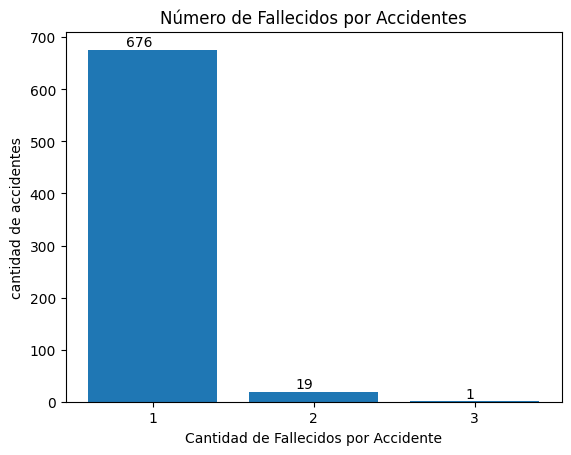

In [18]:
import matplotlib.pyplot as plt

ypoints = victimas
xpoints = ['1','2','3']
plt.title('Número de Fallecidos por Accidentes')
plt.xlabel('Cantidad de Fallecidos por Accidente')
plt.ylabel('cantidad de accidentes')
plt.bar(xpoints, ypoints)
for i, v in enumerate(victimas):
    plt.text(i, v + 0.1, str(v), ha='right', va='bottom')
plt.show()


Como mencionamos anteriormente. En la mayoría de los casos solo muere una persona.

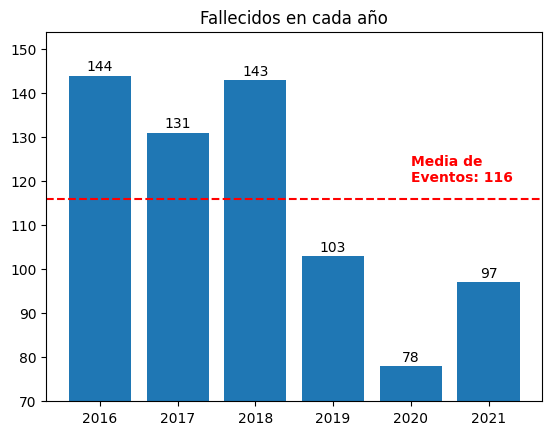

In [19]:
x = [2016, 2017, 2018, 2019, 2020, 2021]
y = AAAA
plt.bar(x, y)
for i, v in enumerate(y):
    plt.text(x[i], v + 0.5, str(v), ha='center', va='bottom')

plt.ylim(70, max(y) + 10)
plt.title('Fallecidos en cada año')
plt.axhline(y.mean(), linestyle="--", color="r")
plt.text(2020, 120, f"Media de \nEventos: {y.mean():.0f}", color = "r", fontweight = 'bold')
plt.show()

Como se observa, los tres primeros años superan a la media en comparación a los tres siguientes. Se presume que la baja de los accidentes a partir del 2019 se debe a la pandemia ya que habían menos vehiculos circulando

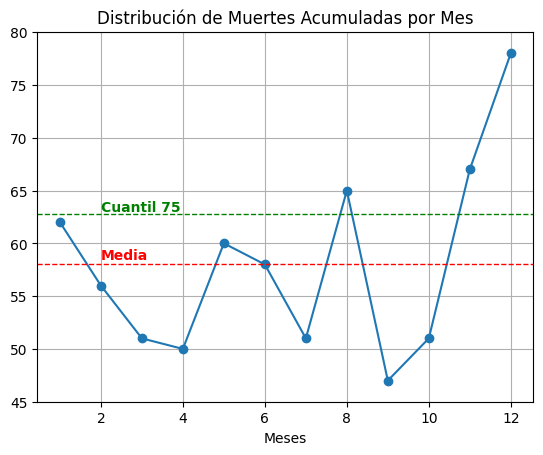

In [20]:
plt.plot(MM.index, MM.values, marker = "o")
plt.ylim(40, 70 + 10)

plt.axhline(MM.quantile(0.75), color='g', linestyle='--', linewidth=1, label='cuantil 0.75 ')
plt.text(2, 63, 'Cuantil 75', color = 'g', fontweight='bold')
plt.axhline(MM.mean(), color='r', linestyle='--', linewidth=1, label='Media general ')
plt.text(2, 58.5, 'Media', color = 'r', fontweight= 'bold')
plt.ylim(45, 80)
plt.title('Distribución de Muertes Acumuladas por Mes')
plt.grid()
plt.xlabel('Meses')
plt.show()



Se puede apreciar que los meses superiores al cuantil 0.75 fueron:

1) Diciembre
2) Noviembre
3) Agosto

y entre cuantil 0.75 y la media:

4) Enero
5) Mayo
6) Junio

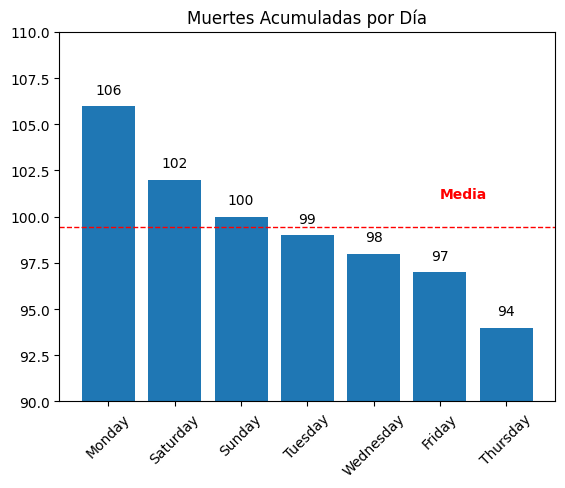

In [21]:

plt.bar(dias.index, dias.values)
plt.ylim(90,110)
for i, v in enumerate(dias.values):
    plt.text(dias.index[i], v + 0.5, str(v), ha='center', va='bottom')
plt.title('Muertes Acumuladas por Día')
plt.xticks(rotation=45)
plt.axhline(dias.values.mean(), color='r', linestyle='--', linewidth=1, label='Media general ')
plt.text(5, 101, 'Media', color = 'r', fontweight= 'bold')
plt.show()

Se puede observar una tendencia a mayor
número de muertes en los siguientes días

(1 Lunes
(2 Sábados
(3 Domingos

In [22]:
indice_lista = (HH.index).to_list()
indices_cadenas = [str(indice) for indice in indice_lista]


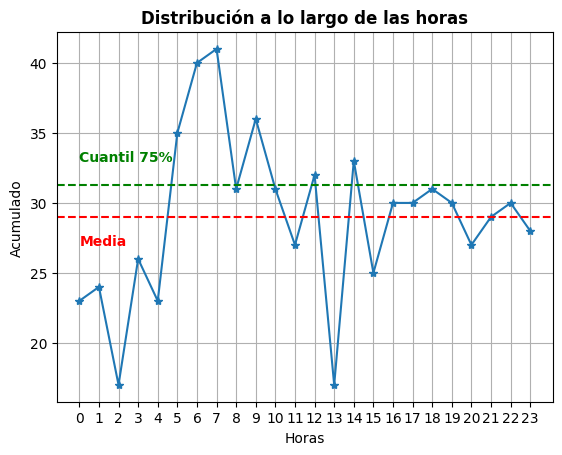

In [23]:
plt.plot(indices_cadenas, HH.values, marker="*")
plt.grid()
plt.title('Distribución a lo largo de las horas', fontweight='bold')
plt.axhline(HH.values.mean(), color="r", linestyle='--')
plt.axhline(HH.quantile(0.75), color="g", linestyle='--')
plt.text(0, 33, 'Cuantil 75%', color='g', fontweight= 'bold')
plt.text(0, 27, 'Media', color='r', fontweight='bold')
plt.xlabel('Horas')
plt.ylabel('Acumulado')
plt.show()

Lo que se puede apreciar es que durante la
mañana es cuando más accidentes ocurren:

1) 7hs

2) 6hs

3) 9hs

4) 5hs

5) 14hs

6) 12hs

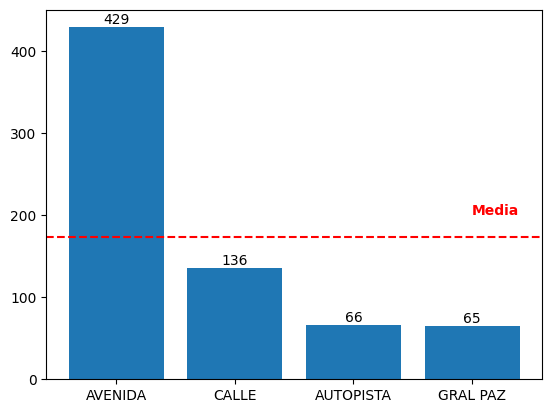

In [24]:
plt.bar(tipo_calle.index, tipo_calle.values)
for i, v in enumerate(tipo_calle.values):
    plt.text(tipo_calle.index[i], v + 0.5, str(v), ha='center', va='bottom')
plt.axhline(tipo_calle.mean(), linestyle = '--', color = 'r')
plt.text(3, 200, "Media", fontweight = 'bold', color = 'r')
plt.show()


Se observa que la media define claramente dos Categorías:

	Grupo 1) Avenida
	Grupo 2) Calle
	         Autopista & Gral Paz

In [25]:
avenidas = datos[datos['TIPO_DE_CALLE']=='AVENIDA']
ave_mean = avenidas['Calle'].value_counts().mean()
ave_std = avenidas['Calle'].value_counts().std()
print(f'Limite superior: {ave_mean+3*ave_std:.2f}')
print(avenidas['Calle'].value_counts().head(3))

Limite superior: 11.16
Calle
RIVADAVIA AV.                 19
DEL LIBERTADOR AV.            18
ALBERDI, JUAN BAUTISTA AV.    13
Name: count, dtype: int64
* * * * * * * * * *  
Este es un listado de las avenidas 
donde mas accidentes susedieron


Limite Outliers superior es 11.16
Por lo que las avenidas con más victimas son:

 RIVADAVIA AV.                 con 19

 DEL LIBERTADOR AV.            con 18

 ALBERDI, JUAN BAUTISTA AV.    con 13

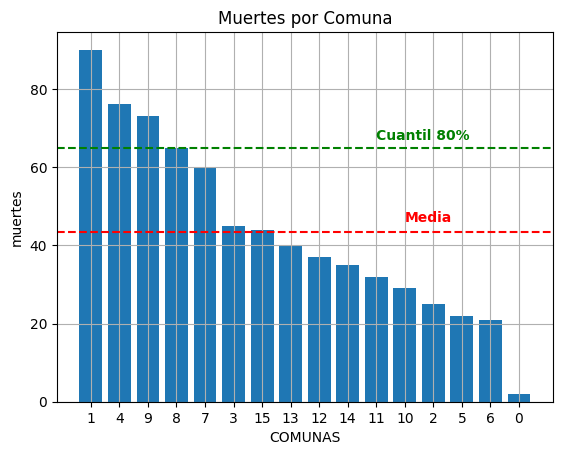

In [26]:
com_indx = (comuna.index).to_list()
comunaInd = [str(indice) for indice in com_indx]
plt.bar(comunaInd, comuna.values)
plt.title('Muertes por Comuna')
plt.axhline(comuna.values.mean(), color='r', linestyle='--')
plt.text(10,67, 'Cuantil 80%', color='g', fontweight='bold')
plt.axhline(comuna.quantile(0.80), color='g', linestyle='--')
plt.text(11,46, 'Media', color='r', fontweight='bold')
plt.xlabel('COMUNAS')
plt.ylabel('muertes')
plt.grid()
plt.show()

Las comunas más accidentadas son: 1, 4, 9

Seguidas por: 8, 7, 3, 15

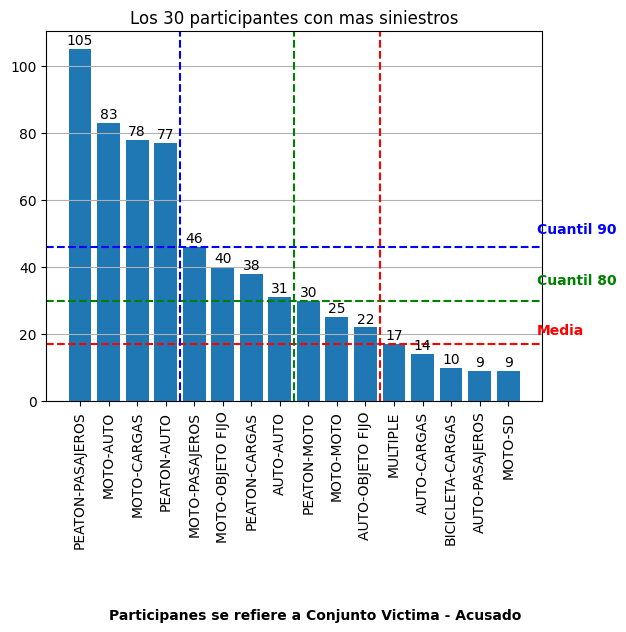

In [27]:
part10 = part.head(16)
cuantil_80 = np.percentile(part.values, 80)
cuantil_90 = np.percentile(part.values, 90)
plt.bar(part10.index, part10.values)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title('Los 30 participantes con mas siniestros')
for i, v in enumerate(part10.values):
    plt.text(part10.index[i], v + 0.5, str(v), ha='center', va='bottom')

plt.axhline(part.values.mean(), color='r', linestyle='--')
plt.text(16,20, 'Media', color='r', fontweight='bold')

plt.axhline(cuantil_80, color='g', linestyle='--')
plt.text(16,35, 'Cuantil 80', color='g', fontweight='bold')

plt.axhline(cuantil_90, color='b', linestyle='--')
plt.text(16,50, 'Cuantil 90', color='b', fontweight='bold')

plt.axvline(x=7.5, color='g', linestyle='--')
plt.axvline(x=3.5, color='b', linestyle='--')
plt.axvline(x=10.5, color='r', linestyle='--')

plt.text(1, -65, 'Participanes se refiere a Conjunto Victima - Acusado', fontweight='bold')

plt.show()

Por encima de la media, el grupo de víctimas que mas se repite es el de motociclistas, seguido por el de peatones.

Sugiriendo porqué el segundo KPI es sobre víctimas motociclistas

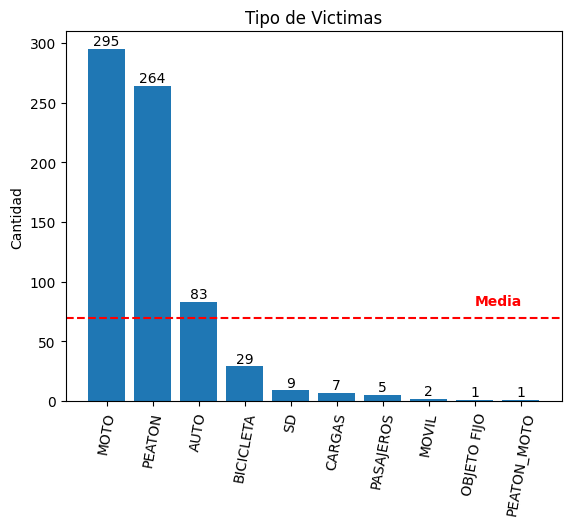

In [28]:
victima
plt.bar(victima.index, victima.values)
for i, v in enumerate(victima.values):
    plt.text(victima.index[i], v + 0.5, str(v), ha='center', va='bottom')
plt.xticks(rotation=80)
plt.title("Tipo de Victimas")
plt.ylabel('Cantidad')
plt.axhline(victima.values.mean(), color='r', linestyle='--')
plt.text(8,80, 'Media', color='r', fontweight='bold')
plt.show()

Se Aprecia que la mayoría de las victimas con
Motos y Peatones. Lo que guarda relación con el gráfico anterior.

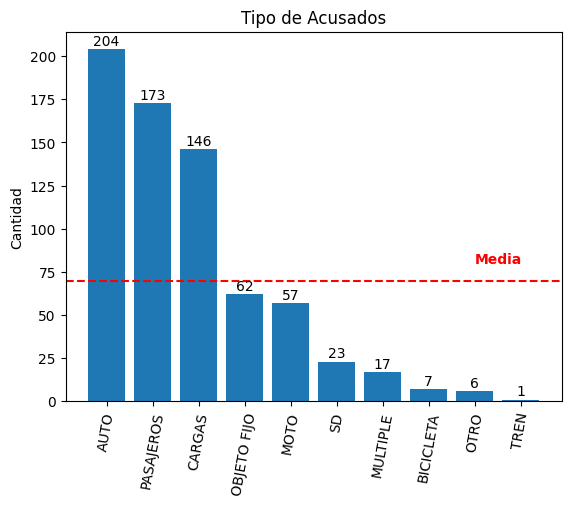

In [29]:
acusado
plt.bar(acusado.index, acusado.values)
for i, v in enumerate(acusado.values):
    plt.text(acusado.index[i], v + 0.5, str(v), ha='center', va='bottom')
plt.xticks(rotation=80)
plt.title("Tipo de Acusados")
plt.ylabel('Cantidad')
plt.axhline(acusado.values.mean(), color='r', linestyle='--')
plt.text(8,80, 'Media', color='r', fontweight='bold')
plt.show()


Aquí se aprecia que autos, pasajeros y vehículos de carga son los mayores causantes de accidentes.

-------------------------------------
Ahora analizamos la hoja 2

-------------------------------------

In [30]:
try:
    datos2 = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')
    print('Archivo cargado')

    print(datos2.dtypes)
except:
    print('No se encontró el archivo')


Archivo cargado
ID_hecho                       object
FECHA                  datetime64[ns]
AAAA                            int64
MM                              int64
DD                              int64
ROL                            object
VICTIMA                        object
SEXO                           object
EDAD                           object
FECHA_FALLECIMIENTO            object
dtype: object


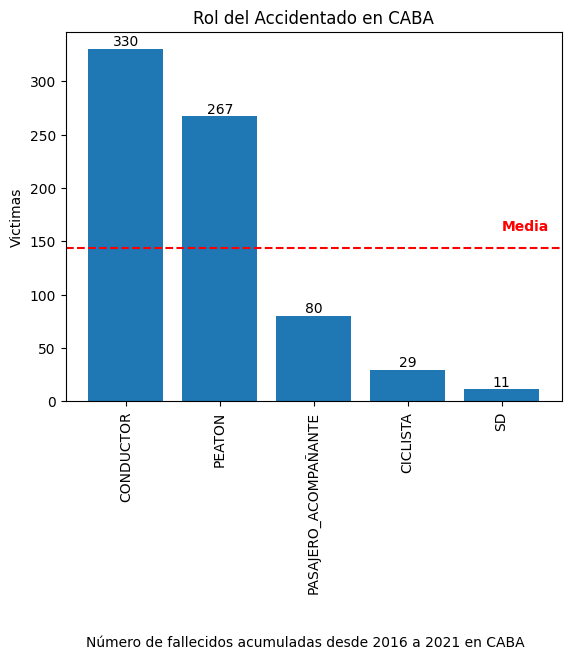

In [31]:
datos2['ROL'].value_counts()
plt.bar(datos2['ROL'].value_counts().index, datos2['ROL'].value_counts().values)
plt.xticks(rotation=90)
plt.ylabel('Victimas')
plt.title('Rol del Accidentado en CABA')
plt.figtext(0.5, -0.40, "Número de fallecidos acumuladas desde 2016 a 2021 en CABA", ha="center", fontsize=10)
for i, v in enumerate(datos2['ROL'].value_counts().values):
    plt.text(datos2['ROL'].value_counts().index[i], v + 0.5, str(v), ha='center', va='bottom')
plt.axhline(datos2['ROL'].value_counts().mean(), color='r', linestyle='--')
plt.text(4,160, 'Media', color='r', fontweight='bold')
plt.show()

Las victimas al momento del accidente ocupan el rol de conductores y peatones

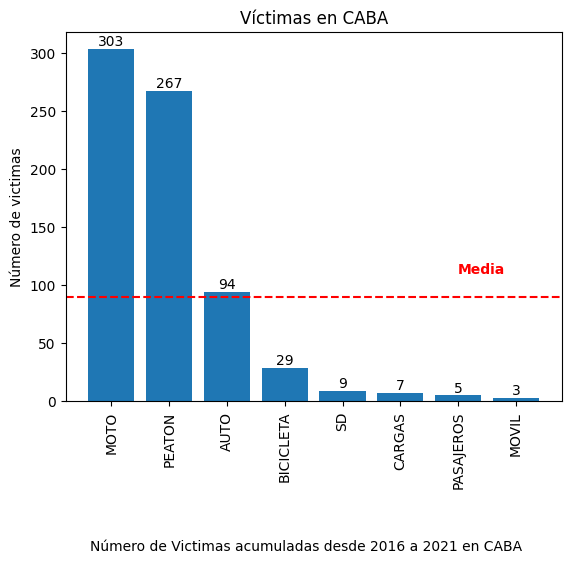

In [32]:
datos2['VICTIMA'].value_counts()
plt.bar(datos2['VICTIMA'].value_counts().index, datos2['VICTIMA'].value_counts().values)
plt.xticks(rotation=90)
plt.ylabel('Número de victimas')
plt.title('Víctimas en CABA')
plt.figtext(0.5, -0.20, "Número de Victimas acumuladas desde 2016 a 2021 en CABA", ha="center", fontsize=10)
for i, v in enumerate(datos2['VICTIMA'].value_counts().values):
    plt.text(datos2['VICTIMA'].value_counts().index[i], v + 0.5, str(v), ha='center', va='bottom')

plt.axhline(datos2['VICTIMA'].value_counts().mean(), color='r', linestyle='--')
plt.text(6,110, 'Media', color='r', fontweight='bold')

plt.show()


Como se observó en la otra hoja. La mayor cantidad de víctimas se encuentran entre motos y peatones.

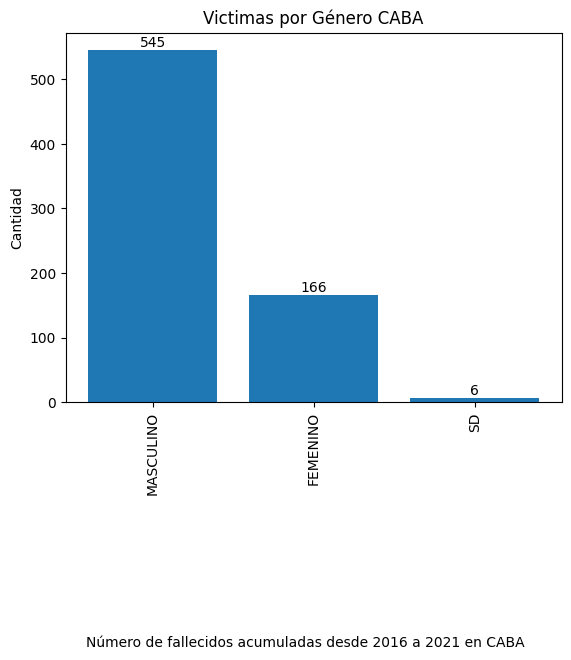

In [33]:
datos2['SEXO'].value_counts()
plt.bar(datos2['SEXO'].value_counts().index, datos2['SEXO'].value_counts().values)
plt.xticks(rotation=90)
plt.ylabel('Cantidad')
plt.title('Victimas por Género CABA')
plt.figtext(0.5, -0.40, "Número de fallecidos acumuladas desde 2016 a 2021 en CABA", ha="center", fontsize=10)
for i, v in enumerate(datos2['SEXO'].value_counts().values):
    plt.text(datos2['SEXO'].value_counts().index[i], v + 0.5, str(v), ha='center', va='bottom')
plt.show()


En cuestión de género se observa mas victimas masculinas que femeninas

In [34]:
#datos2['EDAD'].value_counts()
print('Registros sin edad: ',datos2['EDAD'][datos2['EDAD']=='SD'].count())
print('Registros con edad: ',datos2['EDAD'][datos2['EDAD']!='SD'].count())
edad = datos2['EDAD'][datos2['EDAD']!='SD']
print(type(edad))
print(edad.shape)

Registros sin edad:  53
Registros con edad:  664
<class 'pandas.core.series.Series'>
(664,)


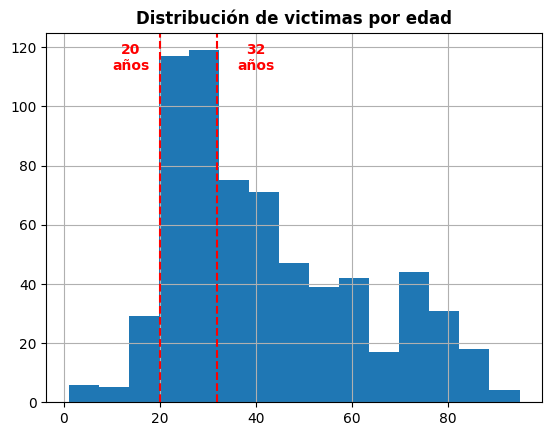

In [35]:
plt.hist(edad, bins=15)
plt.axvline(x=32, color='red', linestyle='--')
plt.axvline(x=20, color='red', linestyle='--')
plt.text(40, plt.ylim()[1] * 0.9, '32\naños', color='red', ha='center', fontweight='bold')
plt.text(14, plt.ylim()[1] * 0.9, '20\naños', color='red', ha='center', fontweight='bold')
plt.title('Distribución de victimas por edad', fontweight='bold')
plt.grid(True)
plt.show()

El rango etario más accidentado se encuentra entre los 20 y 32 años. Aunque hay una proporción relativa sin su edad registrada (53 registros de 717)

In [36]:
#datos3 = datos2[datos2['EDAD']!='SD']
#datos3 = datos3[(datos3['EDAD']>=15) & (datos3['EDAD']<=37)]
#print(datos3.groupby(['ROL', 'VICTIMA', 'SEXO', 'EDAD']).size().sort_values(ascending=False).head(20))
#print('Como se ve aquí, ')

datos3 = datos2[datos2['EDAD']!='SD']
print(datos3.groupby(['ROL', 'VICTIMA', 'SEXO']).size().sort_values(ascending=False).shape)
print(datos3.groupby(['ROL', 'VICTIMA', 'SEXO']).size().sort_values(ascending=False).head(20))
viky = pd.DataFrame(datos3.groupby(['ROL', 'VICTIMA', 'SEXO']).size().sort_values(ascending=False))
viky.to_excel('viky.xlsx')



(20,)
ROL                   VICTIMA    SEXO     
CONDUCTOR             MOTO       MASCULINO    231
PEATON                PEATON     MASCULINO    149
                                 FEMENINO      96
CONDUCTOR             AUTO       MASCULINO     58
CICLISTA              BICICLETA  MASCULINO     21
PASAJERO_ACOMPAÑANTE  MOTO       FEMENINO      18
                      AUTO       MASCULINO     17
                      MOTO       MASCULINO     16
CONDUCTOR             MOTO       FEMENINO      15
PASAJERO_ACOMPAÑANTE  AUTO       FEMENINO      10
CICLISTA              BICICLETA  FEMENINO       7
SD                    SD         MASCULINO      5
CONDUCTOR             AUTO       FEMENINO       5
PASAJERO_ACOMPAÑANTE  CARGAS     MASCULINO      4
                      PASAJEROS  FEMENINO       3
CONDUCTOR             CARGAS     MASCULINO      3
PASAJERO_ACOMPAÑANTE  MOVIL      MASCULINO      2
                      PASAJEROS  MASCULINO      2
CONDUCTOR             MOVIL      MASCULINO      1
S

In [47]:
viky = pd.read_excel('viky2.xlsx')
print('Promedio: ',viky['Cantidad'].mean())
print('Desvio: ',viky['Cantidad'].std())
print('Outliers Superior',viky['Cantidad'].mean()+3*viky['Cantidad'].std())
print('Outliers Inferior',viky['Cantidad'].mean()-3*viky['Cantidad'].std())

Promedio:  33.2
Desvio:  59.76938135340219
Outliers Superior 212.50814406020658
Outliers Inferior -146.10814406020654


Esto suguiere que los conductores de moto masculinos son los más afectados. Siguiendo este orden, les siguen los peatones y los conductores de auto masculinos.

In [38]:
avenidas.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'dia_semana'],
      dtype='object')

El siguiente código es para generar la tabla relacional. Con ella se pretende construir un KPI que mida las victimas en avenidas.  

In [39]:
avenidas.groupby(['AAAA','COMUNA'])['N_VICTIMAS'].sum().reset_index(name='total_victimas').to_excel('avenidas_cxa.xlsx')
